In [1]:
import datetime
from init import *
from sonde import WoudcProfile

autotime loaded.


In [2]:
profiles = {}
gaw_id = 'MTR'
levs = np.arange(350, 801, 5)
station_name = {'EUK':'Eureka', 'ALT':'Alert', 'SYO':'Syowa', 'DAS':'Davis', 'MBI':'Marambio', 'MTR':'Maitri'}
profiles['MTR'] = WoudcProfile('MTR', datetime.date(1980, 1, 1), datetime.date(2020, 4, 30))

Total number of files for MTR: 143
time: 14.9 s


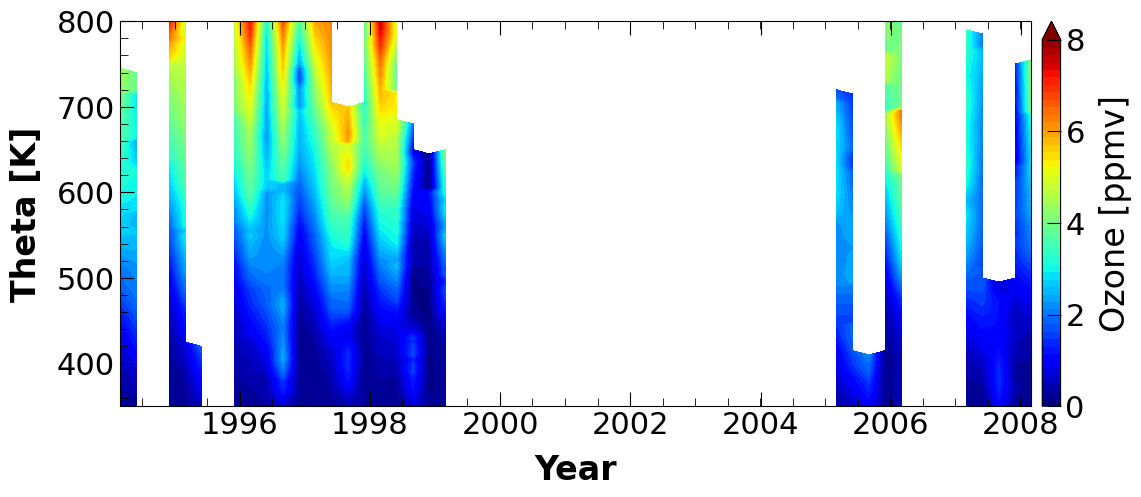

time: 3.51 s


In [74]:
prf = profiles['MTR'].get_profiles()
prf1 = prf.T.resample('Q-NOV').mean().T
prf1 = prf1.to_xarray().to_array(dim='time', name='Ozone').T
# prf1['time'] = pd.to_datetime(prf1.time.values)
prf1 = prf1.interpolate_na(dim='index', method='linear')

levels = np.linspace(0, 8, 50)
fig, ax = plt.subplots(figsize=(14, 5))
im = prf1.plot.contourf(ax=ax, levels=levels, cmap='jet', \
                        add_colorbar=False, extend='max' )
cb = plt.colorbar(im, ticks=np.arange(0, 9, 2), pad=0.01)
cb.ax.set_ylabel('Ozone [ppmv]')
ax.set_ylabel('Theta [K]', fontweight='bold')
ax.set_xlabel('Year', fontweight='bold')
ax.minorticks_on()
plt.savefig('./figs/maitri.profile.strat.png', bbox_inches='tight')
plt.savefig('./figs/maitri.profile.strat.pdf', bbox_inches='tight')
plt.show()